In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9 * 0.9)
plt.rcParams.update({'font.size': 14})

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['savefig.dpi'] = 300

# plt.style.use('default')

In [2]:
import nbimporter
import functions as F

In [17]:
dfs = {
    'dqn': None,
    'expl': None,
    'height': None
}

root = '/home/raul/Documents/ROBOTS/evaluator-push-to-see/dqn_9_1_k_trained_40_sess/'
file_name = 'test_non_agnostic_logs2021-09-07.21:44:01.txt'

df = pd.read_csv(root + file_name)
df = df.fillna(0)
df = df.astype({'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'})
df = df.loc[df['run'] <= 30]

dfs['dqn'] = df

dfs['dqn'].tail()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
560,560,27,30,5,4,-0.004272,0.584926,0.211262,0.026089
561,561,28,30,5,4,-0.016084,0.568841,0.145264,0.029402
562,562,29,30,5,4,0.009919,0.578760,0.186096,0.004003
563,563,30,30,5,3,-0.243706,0.335054,-5.786657,5.568752
564,564,0,30,5,4,0.246817,0.581872,6.223717,5.435347


In [18]:
root = '/home/raul/Documents/ROBOTS/evaluator-push-to-see/expl_100_30_sess/'
file_name = 'test_non_agnostic_logs2021-09-08.07:31:59.txt'

df = pd.read_csv(root + file_name)
df = df.fillna(0)
df = df.astype({'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'})
df = df.loc[df['run'] <= 30]

dfs['expl'] = df

dfs['expl'].tail()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
616,616,2,30,5,2,0.245998,0.030793,7.239436,5.346704
617,617,3,30,5,3,0.278464,0.309257,8.818751,7.141357
618,618,4,30,5,4,0.245657,0.554915,7.083081,5.171128
619,619,5,30,5,3,-0.246805,0.308110,-5.070130,5.818213
620,620,0,30,5,5,0.523497,0.831607,28.420273,26.466442


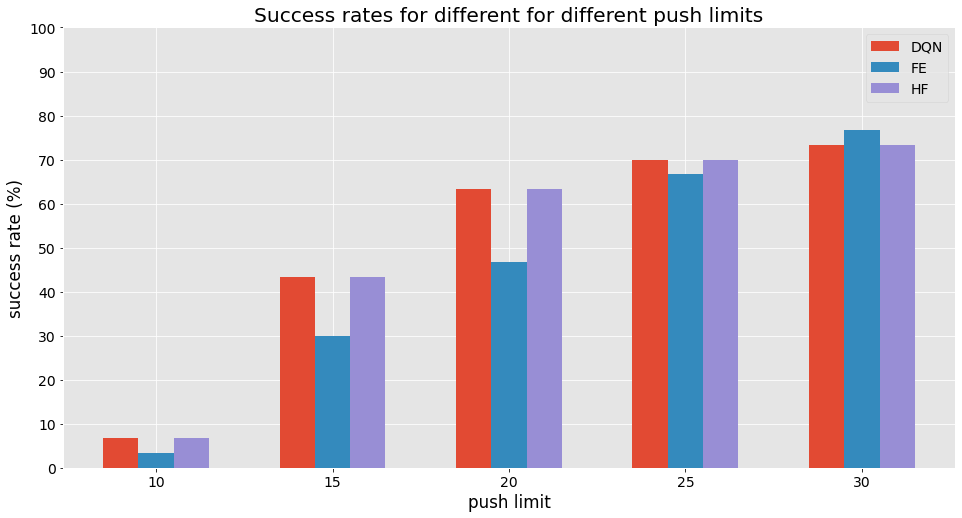

In [67]:
def plot_success_rate_baselines(dfs, success_thrs):

    x = np.array(success_thrs)

    fig, ax = plt.subplots()
    width = 1
    
    frames = [[], [], []]
    
    for t in success_thrs:
        dqn = F.success_rate(dfs['dqn'], t)
        frames[0].append(dqn)
        
        expl = F.success_rate(dfs['expl'], t)
        frames[1].append(expl)
        
        height = F.success_rate(dfs['dqn'], t)
        frames[2].append(height)
        
    frames = np.array(frames)
    
    ax.bar(x - width, frames[0] * 100, width, label='DQN')
    ax.bar(x, frames[1] * 100, width, label='FE')
    ax.bar(x + width, frames[2] * 100, width, label='HF')

    ax.set_xlabel('push limit')
    ax.set_ylabel('success rate (%)')
    
    ax.set_title(f'Success rates for different for different push limits')
    
    ax.set_xticks(success_thrs)
    ax.set_yticks(list(range(0, 110, 10)))
    
    ax.legend()
    
plot_success_rate_baselines(dfs, [10, 15, 20, 25, 30])

In [31]:
# F.plot_targets_found_per_session_iteration(dfs['dqn'], 15)

sr = F.success_rate(dfs['dqn'], 25)
print(sr)

0.7


In [32]:
# F.plot_targets_found_per_session_iteration(dfs['expl'], 15)

sr = F.success_rate(dfs['expl'], 25)
print(sr)

0.6666666666666666
